# Regression from Microsoft Learn- part 1

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
%matplotlib inline

## Explore the Data

In [5]:
# load the training dataset
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data.head()
# rentals is the label, or the thing we want to predict
# everything else is a feature

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [7]:
# feature engineering can be preformed to combine or derive new features
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
# this is a new feature that is derived from the dteday feature which extracts the day of the month from the date
bike_data.head(32)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5
5,6,1/6/2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,6
6,7,1/7/2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,7
7,8,1/8/2011,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,8
8,9,1/9/2011,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,9
9,10,1/10/2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,10


In [9]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
bike_data[numeric_features + ['rentals']].describe()
# describe provides some descriptive statistics of your data

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


C:\Users\dhsav\AppData\Local\Temp\ipykernel_30128\722906803.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


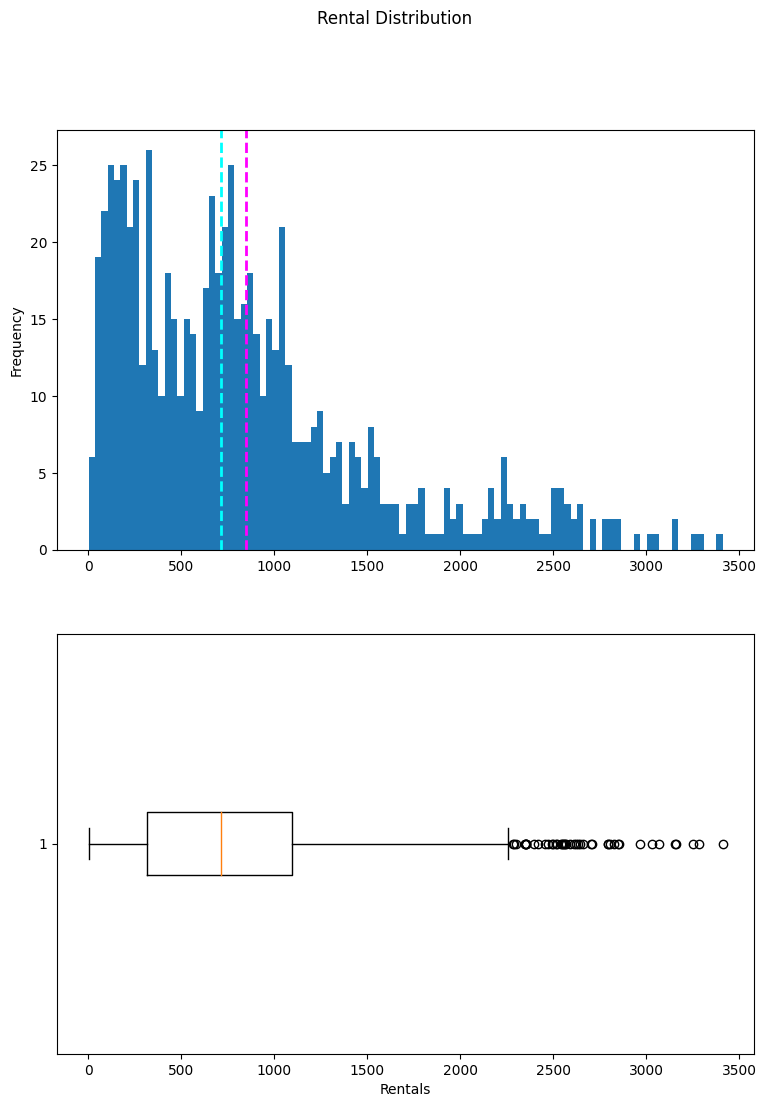

In [12]:
# get the label column
label = bike_data['rentals']

# create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# plot histogram (ax[0] means we are plotting in the first row, first column)
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# add lines for mean, median, mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# plot boxplot
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Rentals')

# add figure title
fig.suptitle('Rental Distribution')

fig.show()

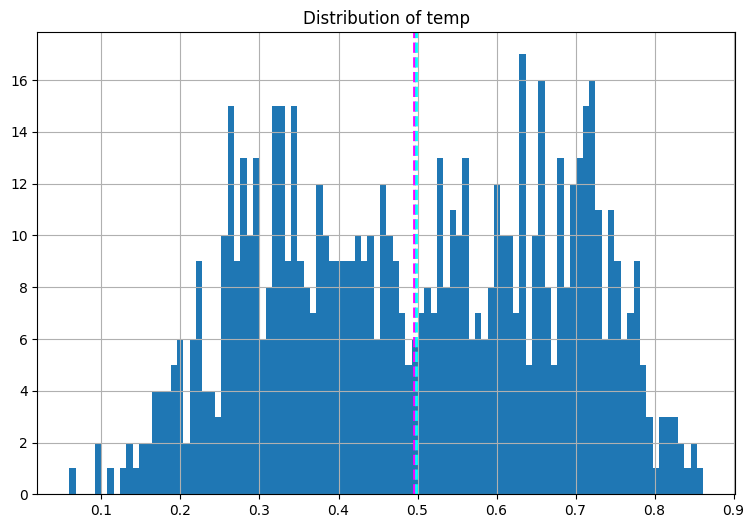

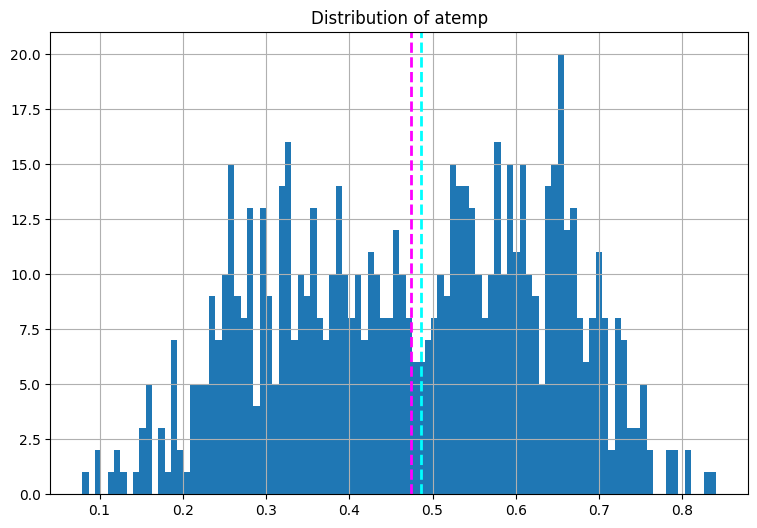

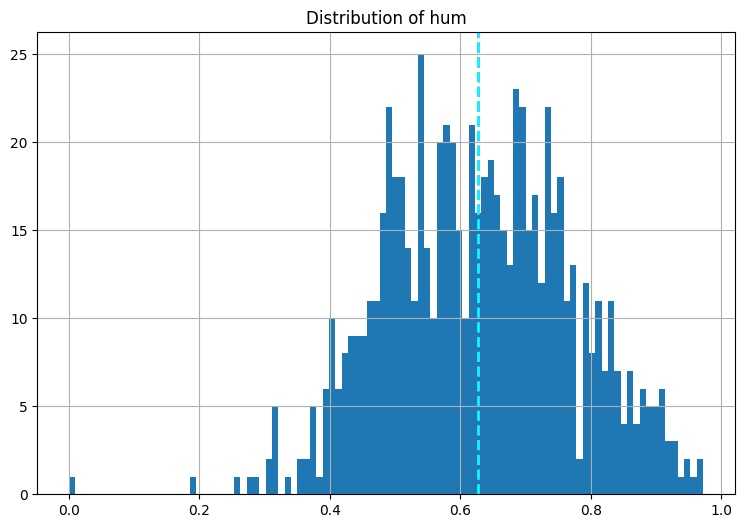

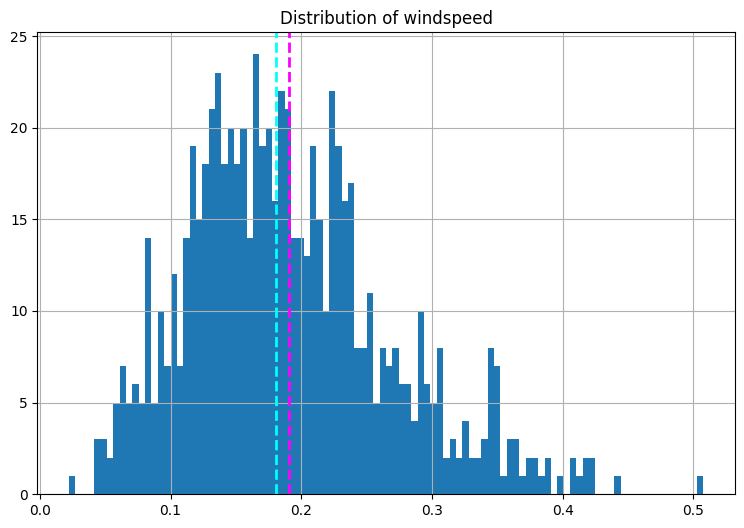

In [13]:
# plot histogram of numeric features
for col in numeric_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = bike_data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title('Distribution of ' + col)
plt.show()

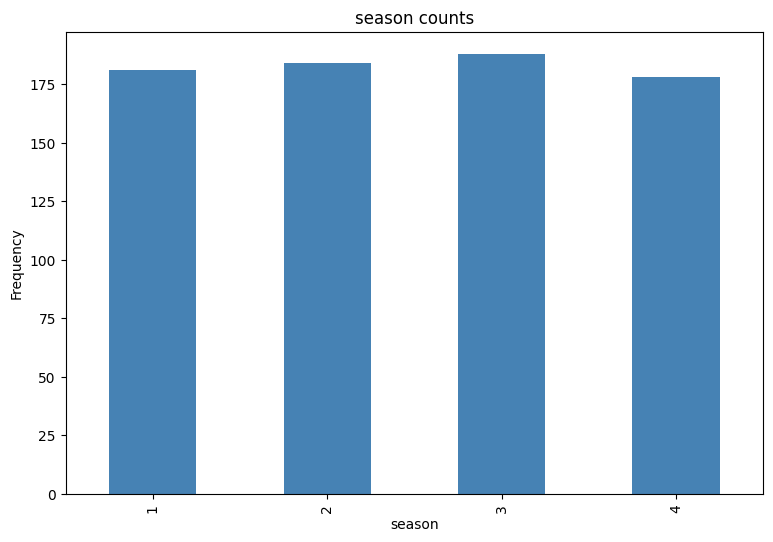

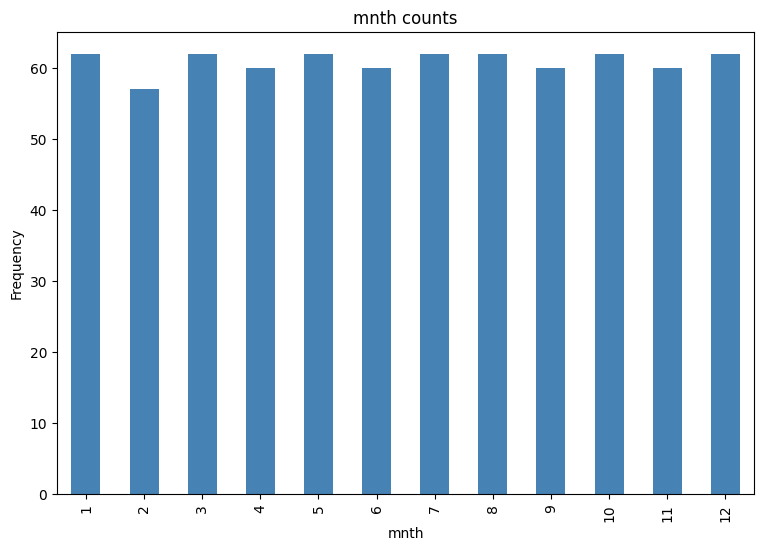

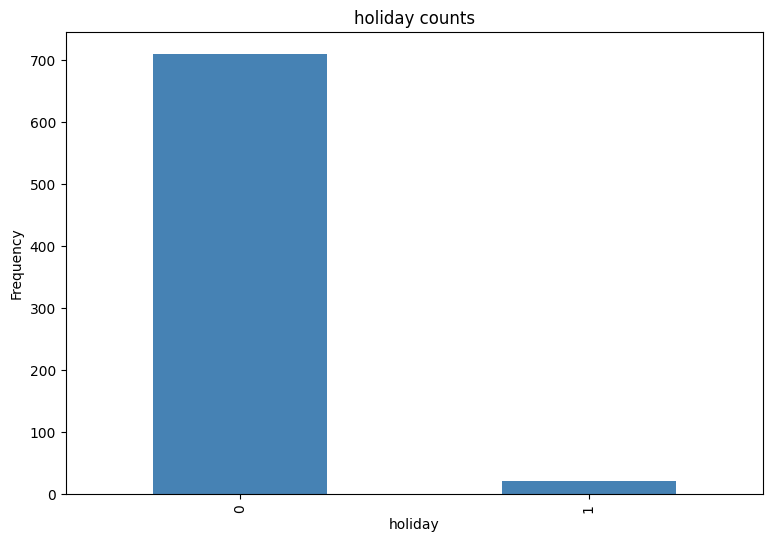

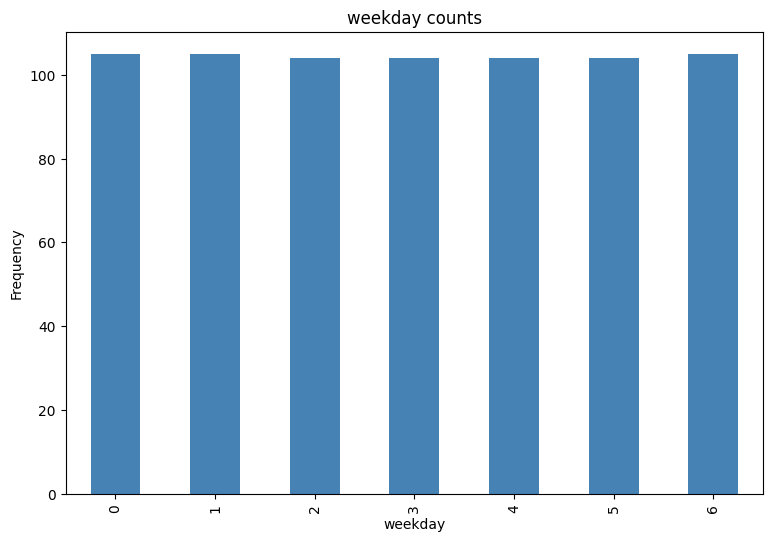

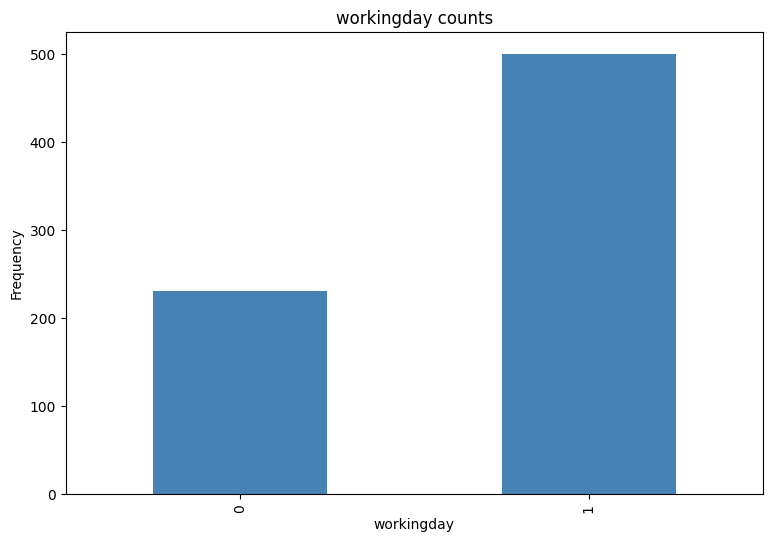

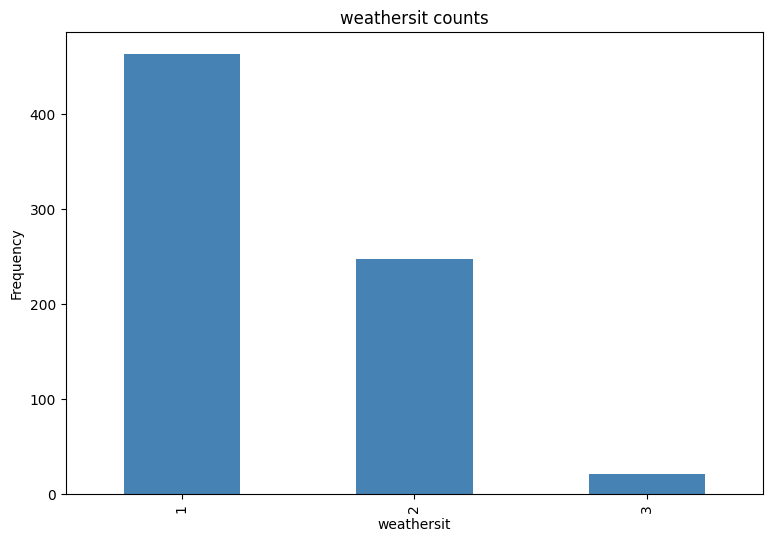

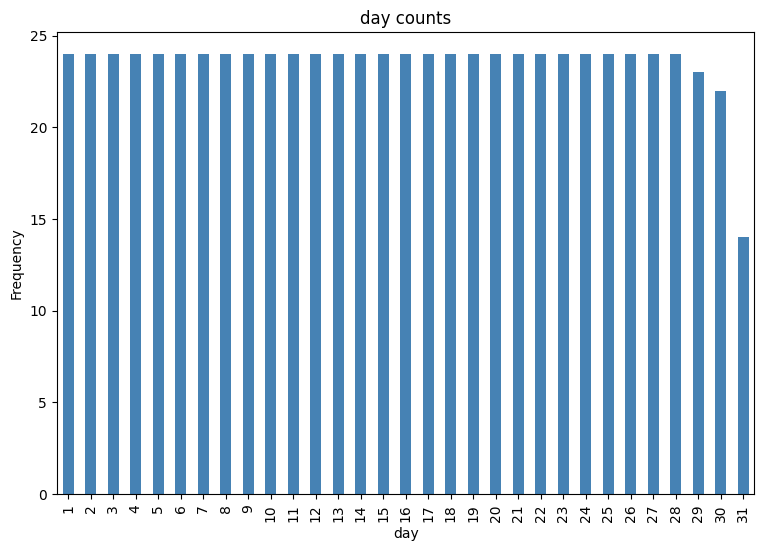

In [16]:
# categorical values can't be visualized the same way as numeric values
# we can use a bar chart to visualize the distribution of the counts categorical values

categorical_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'day']

for col in categorical_features:
    counts = bike_data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
plt.show()

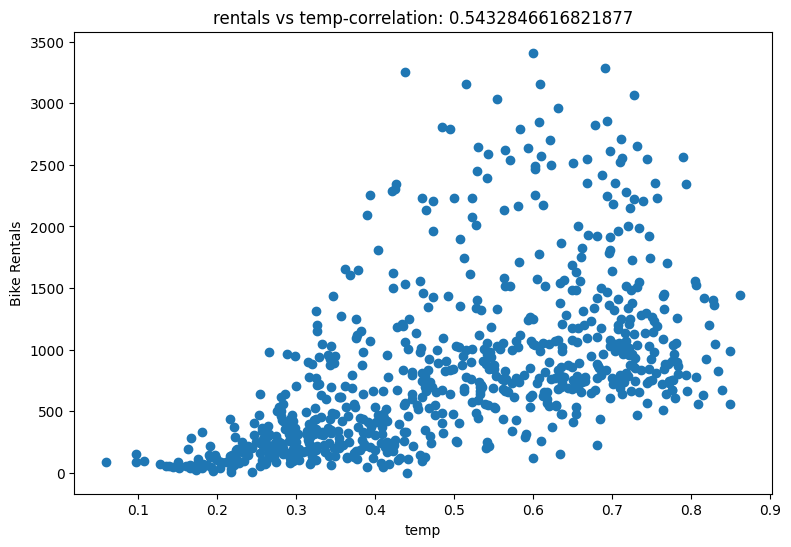

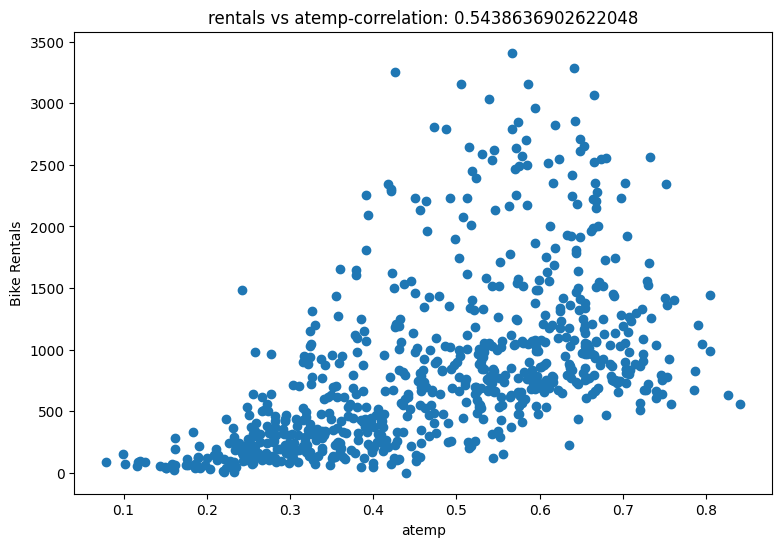

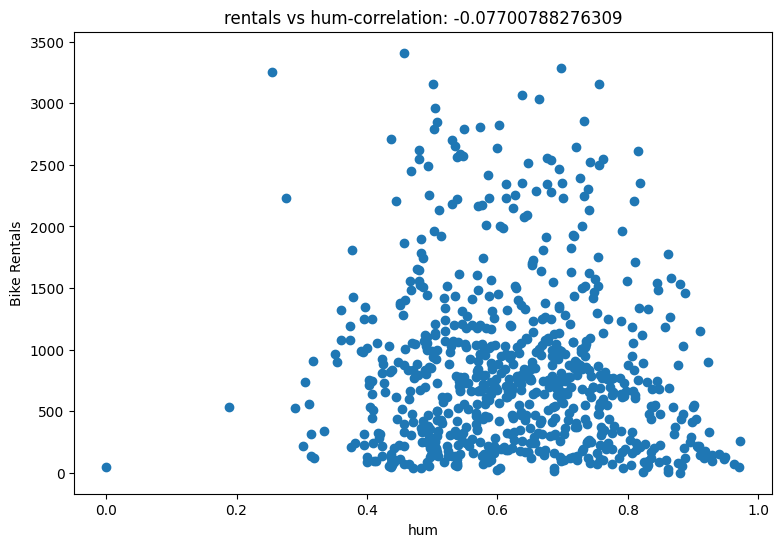

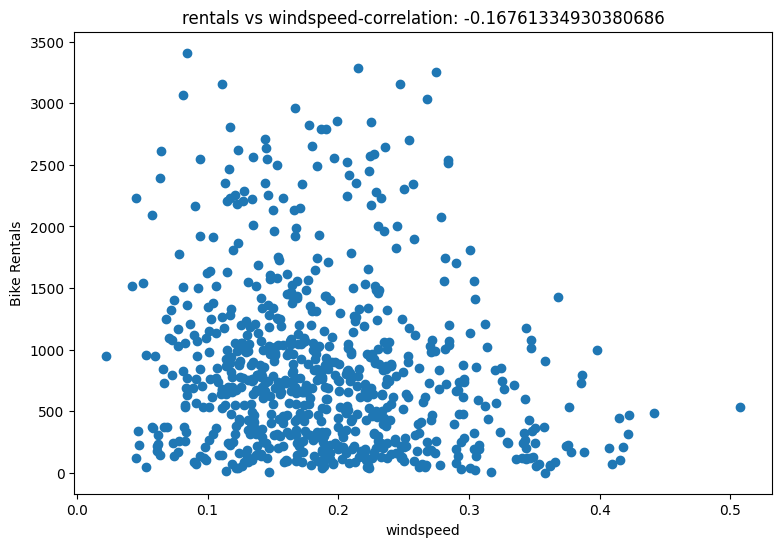

In [17]:
# now we start to look for relationships between features and the label
# we can use a scatter plot to visualize the relationship between a numeric feature and the label

for col in numeric_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca() 
    feature = bike_data[col]
    label = bike_data['rentals']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel("Bike Rentals")
    ax.set_title('rentals vs ' + col + '-correlation: ' + str(correlation))
plt.show()


Temp and atemp seem to show vague diagonal trends which have higher rental counts occuring at higher temperatures. This is supposrted by positive correlation coefficients. hum and windspeed have slight negative correlations.

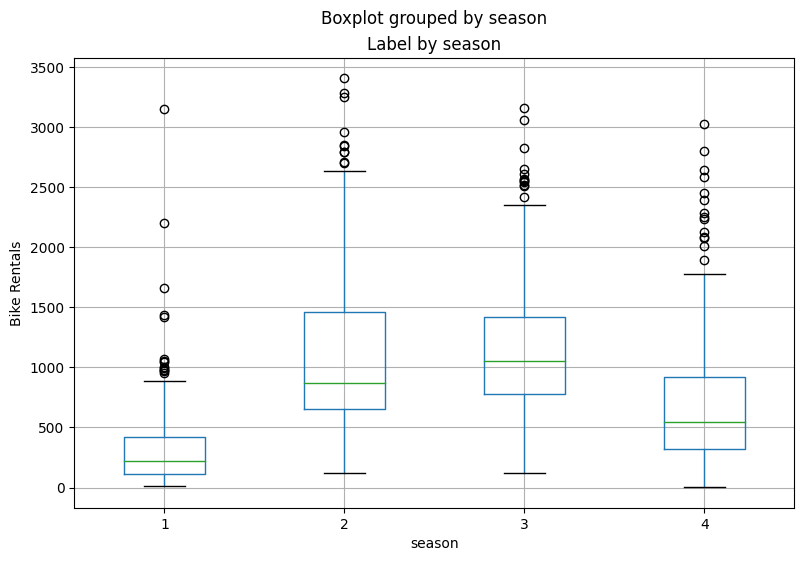

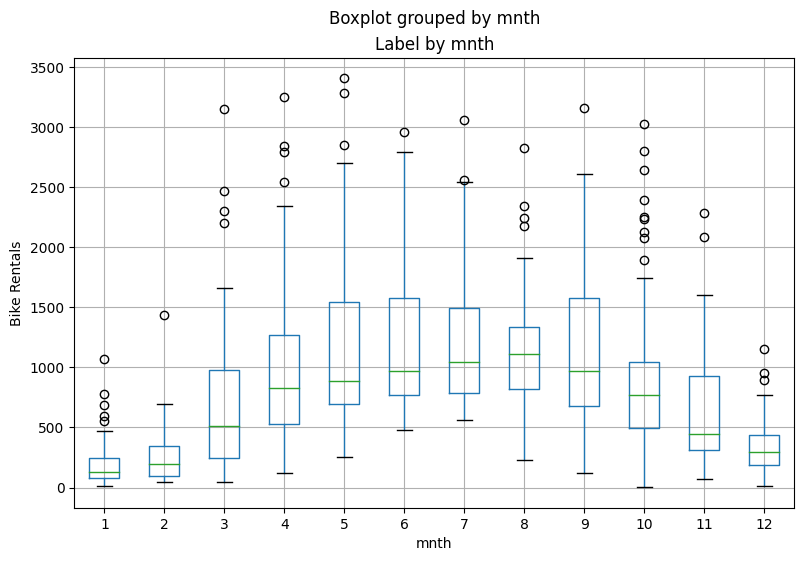

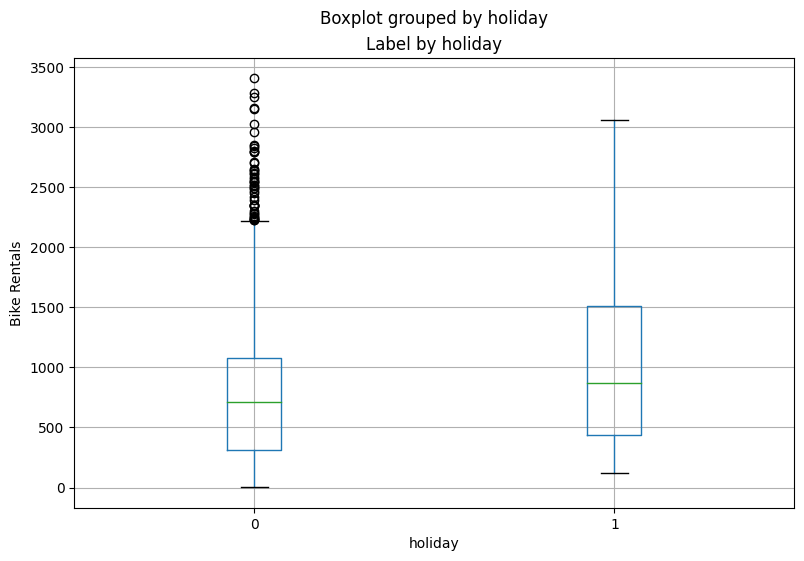

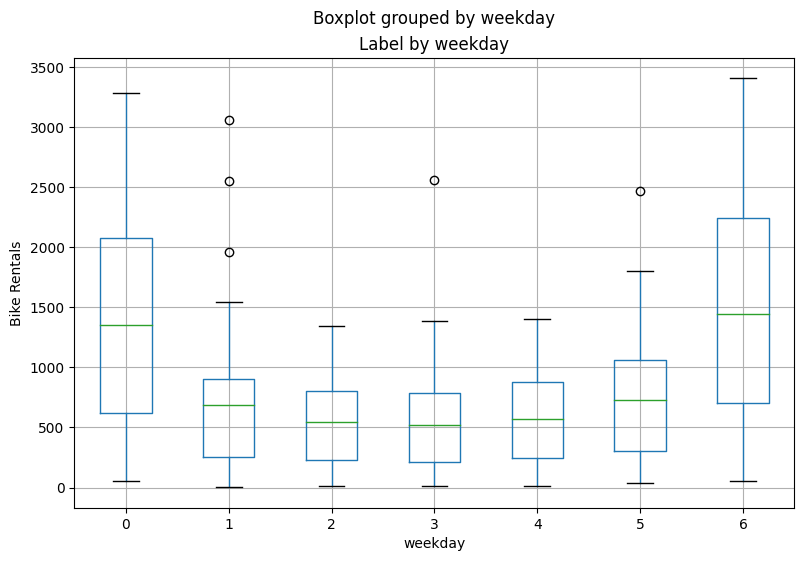

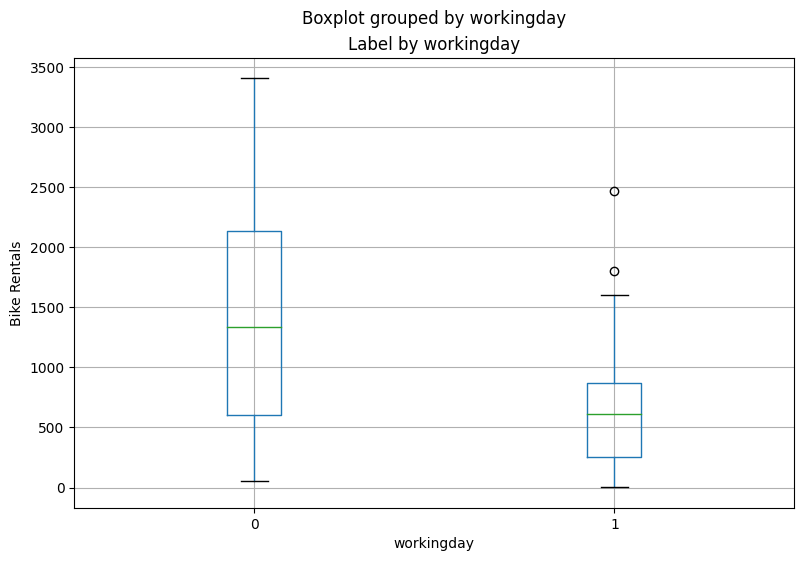

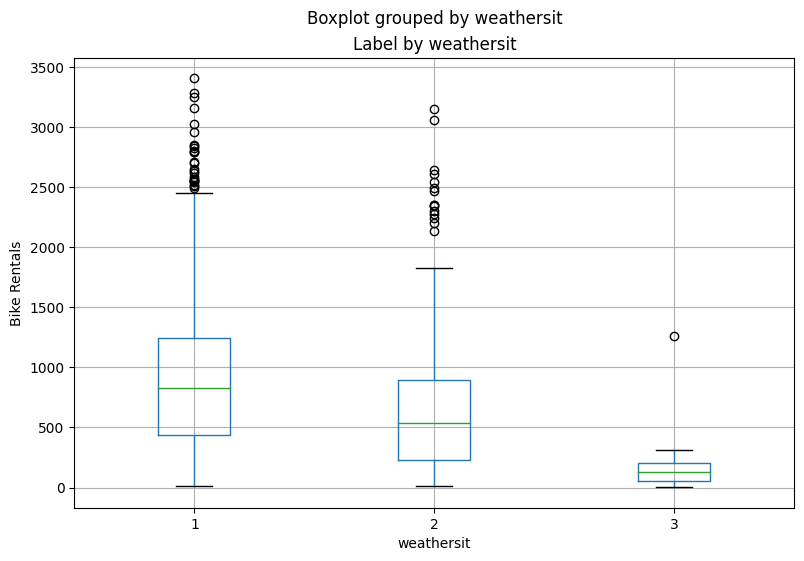

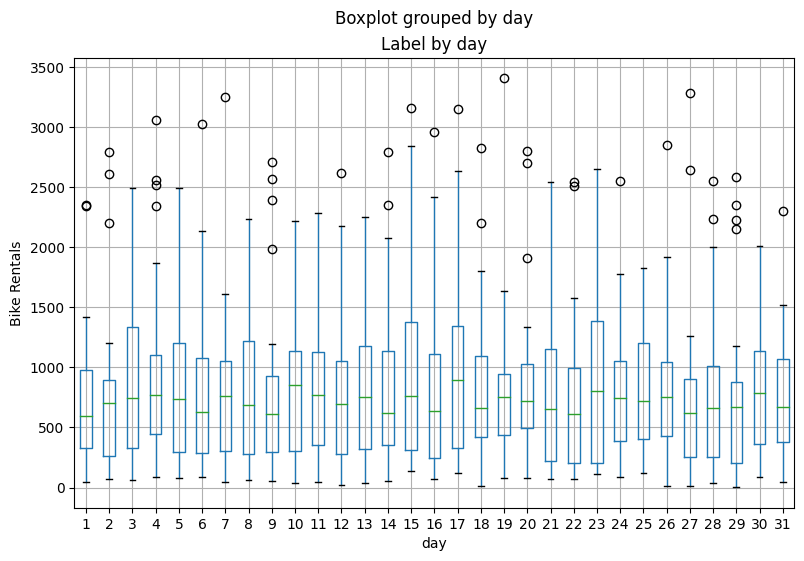

In [18]:
# plot boxplots for the label by each categorical feature
for col in categorical_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    bike_data.boxplot(column='rentals', by=col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Bike Rentals")
plt.show()

## Train a Regression Model

In [21]:
# First, separate features and labels
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values
print('Features:', X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[1.        1.        0.        6.        0.        2.        0.344167
  0.363625  0.805833  0.160446 ]
 [1.        1.        0.        0.        0.        2.        0.363478
  0.353739  0.696087  0.248539 ]
 [1.        1.        0.        1.        1.        1.        0.196364
  0.189405  0.437273  0.248309 ]
 [1.        1.        0.        2.        1.        1.        0.2
  0.212122  0.590435  0.160296 ]
 [1.        1.        0.        3.        1.        1.        0.226957
  0.22927   0.436957  0.1869   ]
 [1.        1.        0.        4.        1.        1.        0.204348
  0.233209  0.518261  0.0895652]
 [1.        1.        0.        5.        1.        2.        0.196522
  0.208839  0.498696  0.168726 ]
 [1.        1.        0.        6.        0.        2.        0.165
  0.162254  0.535833  0.266804 ]
 [1.        1.        0.        0.        0.        1.        0.138333
  0.116175  0.434167  0.36195  ]
 [1.        1.        0.        1.        1.        1.        

Now we have 2 numpy arrays, X is the features and y is the labels. We can use these to train a regression model.

First, we should split the data into a training and test set. We also want to make sure we split the data randomly so the two subsets are statistically comparable. We can use the train_test_split function from sklearn to do this.

In [25]:
# split into a 70-30 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print (f'Training Set: {X_train.shape[0]} rows\nTest Set: {X_test.shape[0]} rows')

Training Set: 511 rows
Test Set: 220 rows


We'll use a linear regression algorithm to find y as a function of x.

In [28]:
# fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print(model)

LinearRegression()


In [29]:
# now to evaluate the model with the test set
predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels:    ', y_test[:10])

Predicted labels:  [1896. 1184. 1007.  -28.  314.  385.  475.  590. 1476.  -22.]
Actual labels:     [2418  754  222   47  244  145  240  555 3252   38]


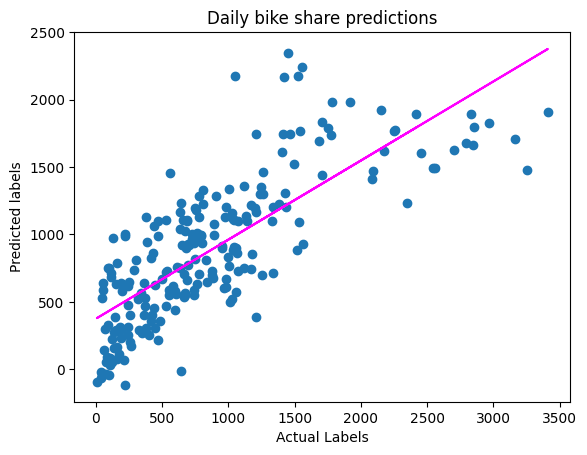

In [30]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted labels')
plt.title('Daily bike share predictions')
# overlay a regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()

We can calculate some commonly use evaluation metrics for this model. We will use Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2).

In [32]:
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 201972.55947035615
RMSE: 449.4135728595167
R2: 0.6040454736919185


This model has some predictive power but it could certainly be improved.